In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# import raw data
# raw data is downloaded from https://www.kaggle.com/zillow/zecon#Zip_time_series.csv
raw_data = pd.read_csv("Zip_time_series.csv")

In [3]:
# get size of data
raw_data.shape

(4383885, 76)

In [4]:
# subset data to focus exploratory analysis on single zip code
# zip code selected as 30309 for Atlanta Midtown
data_30309_inventory_price = raw_data[raw_data['RegionName']==30309]

# select relevant features inventory and listing price the for 1st plot
data_30309_plot_1 = data_30309_inventory_price[['Date','InventoryRaw_AllHomes','MedianListingPrice_AllHomes']]

In [5]:
#data_30309_plot_1.select_dtypes(include=[np.datetime64])

In [6]:
# set column Date as the index for later time series ploting and remove NA
data_30309_plot_1= data_30309_plot_1.dropna()
data_30309_plot_1.select_dtypes(include=[np.datetime64])
data_30309_plot_1.index = data_30309_plot_1['Date']
del data_30309_plot_1['Date']
data_30309_plot_1.head()

,InventoryRaw_AllHomes,MedianListingPrice_AllHomes
Date,,
2010-01-31,506.0,224900.0
2010-02-28,514.0,225900.0
2010-03-31,544.0,229900.0
2010-04-30,599.0,228000.0
2010-05-31,578.0,228750.0


<Figure size 432x288 with 0 Axes>

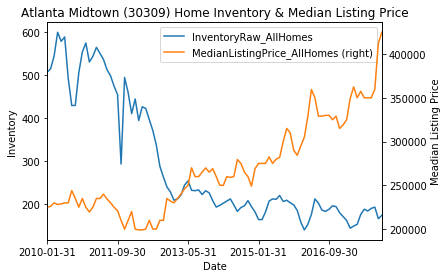

In [7]:
# Plot historical home inventory vs listing price
# For zip code 30309, inventory reduced to historical-low level while avg price increased more 2 folds
# The plot suggests a stronger seller market

plt.figure()

ax = data_30309_plot_1.plot(secondary_y=['MedianListingPrice_AllHomes'])
ax.set_ylabel('Inventory')
ax.right_ax.set_ylabel('Meadian Listing Price')
plt.title("Atlanta Midtown (30309) Home Inventory & Median Listing Price")

plt.show()

In [8]:
# select relevant features inventory and percent of listing with discount for the 2nd plot
data_30309_inv_reduction = raw_data[raw_data['RegionName']==30309]
data_30309_plot_2 = data_30309_inv_reduction[['Date','InventoryRaw_AllHomes','PctOfListingsWithPriceReductions_AllHomes']]


In [9]:
# set column Date as the index for later time series ploting and remove NA
data_30309_plot_2 = data_30309_plot_2.dropna()
data_30309_plot_2.select_dtypes(include=[np.datetime64])
data_30309_plot_2.index = data_30309_plot_2['Date']
del data_30309_plot_2['Date']
data_30309_plot_2.columns=['InventoryRaw', '%WithPriceCut']
data_30309_plot_2.head()

,InventoryRaw,%WithPriceCut
Date,,
2010-09-30,429.0,15.989515
2010-10-31,505.0,15.984148
2010-11-30,553.0,10.405405
2010-12-31,574.0,10.689170
2011-01-31,530.0,13.304721


<Figure size 432x288 with 0 Axes>

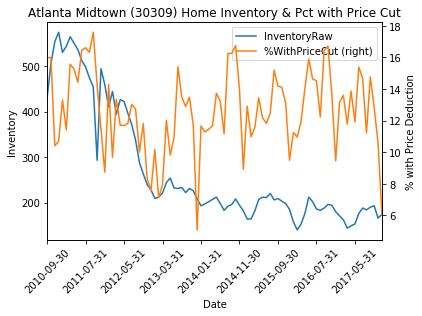

In [10]:
# Plot historical home inventory and percent of listings with discount
# For zip code 30309, percent of listings with discount experienced much more variations compared to inventory
# The plot suggests other underlying factors to drive the sales/promotions of property markets

plt.figure()

ax = data_30309_plot_2.plot(secondary_y=['%WithPriceCut'])
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Inventory')
ax.right_ax.set_ylabel('% with Price Deduction')
plt.title("Atlanta Midtown (30309) Home Inventory & Pct with Price Cut")

plt.show()

In [11]:
# select relevant features inventory and percent of listing with discount for the 3rd plot

data_30309_inv_list_value = raw_data[raw_data['RegionName']==30309]
data_30309_plot_3 = data_30309_inv_list_value[['Date','InventoryRaw_AllHomes','MedianListingPrice_AllHomes','ZHVI_AllHomes']]
data_30309_plot_3.head()

,Date,InventoryRaw_AllHomes,MedianListingPrice_AllHomes,ZHVI_AllHomes
4818,1996-04-30,NaN,NaN,131000.0
18435,1996-05-31,NaN,NaN,132300.0
32222,1996-06-30,NaN,NaN,133400.0
46039,1996-07-31,NaN,NaN,136700.0
59865,1996-08-31,NaN,NaN,140200.0


In [12]:
# set column Date as the index for later time series ploting and remove NA

data_30309_plot_3 = data_30309_plot_3.dropna()
data_30309_plot_3.select_dtypes(include=[np.datetime64])
data_30309_plot_3.index = data_30309_plot_3['Date']
del data_30309_plot_3['Date']

In [13]:
# compute percent of permium of listing price over instrinsic property values
data_30309_plot_3['%Premium_over_value'] = 100*(data_30309_plot_3['MedianListingPrice_AllHomes']-data_30309_plot_3['ZHVI_AllHomes'])/data_30309_plot_3['ZHVI_AllHomes']
data_30309_plot_3 = data_30309_plot_3[['InventoryRaw_AllHomes','%Premium_over_value']]
data_30309_plot_3.head()

,InventoryRaw_AllHomes,%Premium_over_value
Date,,
2010-01-31,506.0,4.946337
2010-02-28,514.0,6.657224
2010-03-31,544.0,9.009009
2010-04-30,599.0,8.778626
2010-05-31,578.0,9.923114


<Figure size 432x288 with 0 Axes>

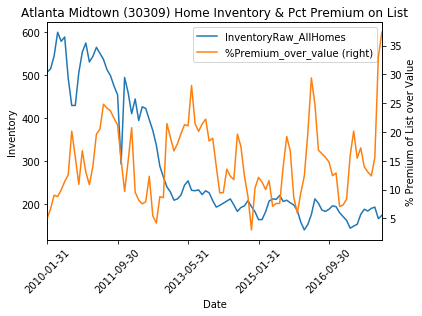

In [14]:
# Plot historical home inventory vs premium of listing price over instrinsic value
# For zip code 30309, percent of premium over the intrinsic value experienced much more variations compared to inventory
# percent of premium also demonstrates some seasonal patterns
# The plot suggests other underlying factors to drive the listing price of property markets

plt.figure()

ax = data_30309_plot_3.plot(secondary_y=['%Premium_over_value'])
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Inventory')
ax.right_ax.set_ylabel('% Premium of List over Value')
plt.title("Atlanta Midtown (30309) Home Inventory & Pct Premium on List")

plt.show()

In [15]:
# use package pyramid arima
from pyramid.arima import auto_arima

/Users/minghanxu/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
median_list_price_30309 = data_30309_plot_1[['MedianListingPrice_AllHomes']]

In [17]:
stepwise_model = auto_arima(median_list_price_30309, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1832.589, BIC=1845.410, Fit time=0.366 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1831.849, BIC=1842.107, Fit time=0.142 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1831.293, BIC=1841.550, Fit time=0.150 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1830.691, BIC=1843.512, Fit time=0.289 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=1832.033, BIC=1842.290, Fit time=0.128 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1836.735, BIC=1844.428, Fit time=0.047 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=183

In [18]:
median_list_price_30309

,MedianListingPrice_AllHomes
Date,
2010-01-31,224900.0
2010-02-28,225900.0
2010-03-31,229900.0
2010-04-30,228000.0
2010-05-31,228750.0
2010-06-30,229900.0
2010-07-31,229950.0
2010-08-31,243900.0
2010-09-30,235000.0


In [19]:
train_30309 = median_list_price_30309.loc[:'2016-12-31']
test_30309 = median_list_price_30309.loc['2017-01-31':]

In [20]:
stepwise_model.fit(train_30309)
future_forecast = stepwise_model.predict(n_periods=12)

In [21]:
print(future_forecast)

[ 324946.32858628  333302.38594027  353224.71534807  379824.49396369
  371615.10327513  356423.37373403  357925.58103066  361981.01665039
  364771.80101806  360463.46878874  360832.76505428  349986.81413303]


In [22]:
future_forecast = pd.DataFrame(future_forecast,index = test_30309.index,columns=['Prediction'])

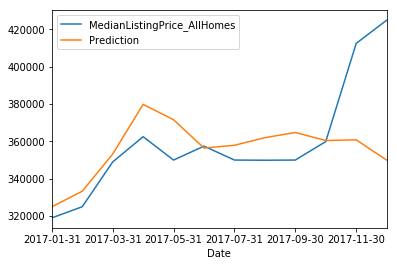

In [23]:
pd.concat([test_30309,future_forecast],axis=1).plot()
plt.show()

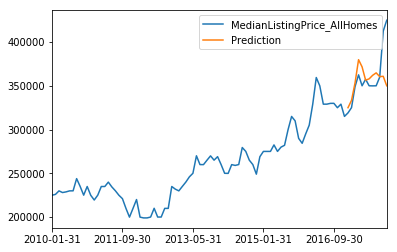

In [24]:
pd.concat([median_list_price_30309,future_forecast],axis=1).plot()
plt.show()

In [25]:
# use facebook prophet
from fbprophet import Prophet

In [26]:
train_30309_prophet = train_30309.copy()
train_30309_prophet.reset_index(level=0, inplace=True)
train_30309_prophet.columns = ['ds','y']
train_30309_prophet

,ds,y
0,2010-01-31,224900.0
1,2010-02-28,225900.0
2,2010-03-31,229900.0
3,2010-04-30,228000.0
4,2010-05-31,228750.0
5,2010-06-30,229900.0
6,2010-07-31,229950.0
7,2010-08-31,243900.0
8,2010-09-30,235000.0
9,2010-10-31,225000.0


In [27]:
model = Prophet() 
model.fit(train_30309_prophet)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


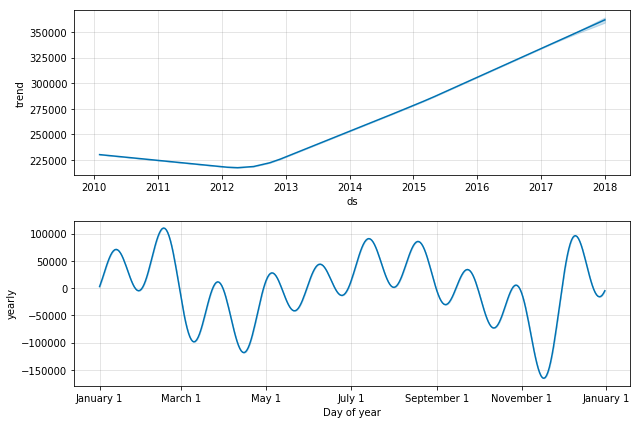

In [28]:
future = model.make_future_dataframe(periods=12, freq='m')
forecast = model.predict(future)
model.plot_components(forecast)

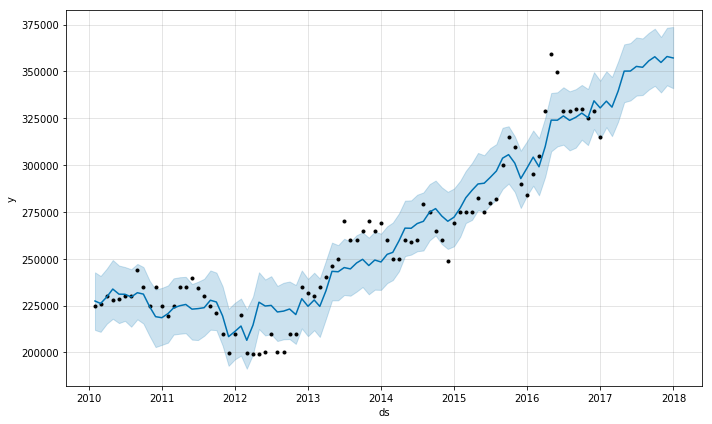

In [29]:
model.plot(forecast)

In [30]:
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,yhat
0,2010-01-31,230158.325264,230158.325264,230158.325264,211982.387128,242742.400098,-2706.245318,-2706.245318,-2706.245318,0.0,0.0,0.0,-2706.245318,-2706.245318,-2706.245318,227452.079946
1,2010-02-28,229685.630220,229685.630220,229685.630220,210985.834117,240789.156408,-3572.054570,-3572.054570,-3572.054570,0.0,0.0,0.0,-3572.054570,-3572.054570,-3572.054570,226113.575650
2,2010-03-31,229162.289279,229162.289279,229162.289279,215296.521250,244728.354614,439.868872,439.868872,439.868872,0.0,0.0,0.0,439.868872,439.868872,439.868872,229602.158151
3,2010-04-30,228655.830303,228655.830303,228655.830303,217958.663664,249307.080217,5169.855762,5169.855762,5169.855762,0.0,0.0,0.0,5169.855762,5169.855762,5169.855762,233825.686065
4,2010-05-31,228132.489485,228132.489485,228132.489485,215651.891026,246369.181957,2970.625238,2970.625238,2970.625238,0.0,0.0,0.0,2970.625238,2970.625238,2970.625238,231103.114723
5,2010-06-30,227626.030629,227626.030629,227626.030629,216850.967338,245573.544285,3416.877175,3416.877175,3416.877175,0.0,0.0,0.0,3416.877175,3416.877175,3416.877175,231042.907804
6,2010-07-31,227102.689759,227102.689759,227102.689759,213721.361086,244393.298916,2497.085579,2497.085579,2497.085579,0.0,0.0,0.0,2497.085579,2497.085579,2497.085579,229599.775337
7,2010-08-31,226579.348888,226579.348888,226579.348888,217665.267601,247229.815716,5285.271278,5285.271278,5285.271278,0.0,0.0,0.0,5285.271278,5285.271278,5285.271278,231864.620166
8,2010-09-30,226072.889980,226072.889980,226072.889980,215407.416289,245580.797560,5054.621543,5054.621543,5054.621543,0.0,0.0,0.0,5054.621543,5054.621543,5054.621543,231127.511523
9,2010-10-31,225549.549125,225549.549125,225549.549125,208777.882374,238303.613260,-1075.270684,-1075.270684,-1075.270684,0.0,0.0,0.0,-1075.270684,-1075.270684,-1075.270684,224474.278441
